In [1]:
import xgboost as xgb 
from xgboost import XGBClassifier, plot_importance
from sklearn import metrics 

from sklearn.model_selection import train_test_split
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

df = pd.read_csv('../../input/train.csv')
df_test = pd.read_csv('../../input/test.csv')

disease_list = df.SUBCLASS.unique()
dd_list = ['BRCA', 'KIPAN' , 'GBMLGG', 'STES']
#too many 변이, ROWs DELETE
#for d in disease_list:
#    td = df[df['SUBCLASS']==d].apply(lambda x : x!='WT').agg(sum , axis=1).sort_values(ascending=False) >= 800 #706
#    if td[td].sum()> 0:
#        print(d, list(td[td].index))
#        df.drop(list(td[td].index), inplace=True)
df

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [5]:
df_target = df['SUBCLASS']
data = df.drop(columns=['ID', 'SUBCLASS'])

total = pd.concat([data, df_test])
f = lambda x : '' if x == 'WT' else x
total = total.map(f)

In [6]:
total

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX,ID
0,,,,,,,,,,,...,,,,,,,,,,NaN
1,,,,,,,,,,,...,,,,,,,,,,NaN
2,R895R,,,,,,,,,,...,,,,,,,,,,NaN
3,,,,,,,,,,,...,,,,,,,,,,NaN
4,,,,,,,,,,,...,,,,,,,,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,,,,,,,,,,,...,,,,,,,,,,TEST_2541
2542,,,,,,,,,,,...,,,,,,,,,,TEST_2542
2543,,,,,,L217I,P221P P251P,R5M,G606D,I248Nfs,...,L232R,,,L305L,,N252I N251I,G679V,,,TEST_2543
2544,,,,,,,,,R1517H,,...,,,,,,,,,,TEST_2544


In [52]:
f = lambda x : '' if x == 'WT' else x
df = df.map(f)

In [53]:
df

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,,,,,,,,,...,,,,,,,,,,
1,TRAIN_0001,SARC,,,,,,,,,...,,,,,,,,,,
2,TRAIN_0002,SKCM,R895R,,,,,,,,...,,,,,,,,,,
3,TRAIN_0003,KIRC,,,,,,,,,...,,,,,,,,,,
4,TRAIN_0004,GBMLGG,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,,,,,,,,,...,,,,,,,,,,
6197,TRAIN_6197,LGG,,,,,,,,,...,,,,,,,,,,
6198,TRAIN_6198,COAD,,,,,,,,,...,,,,,,,,,T181S,
6199,TRAIN_6199,TGCT,,,,,,,,,...,,,,,,,,,,


In [74]:
td = df[df['SUBCLASS']=='KIPAN']

In [75]:
",".join(td['A2M'])

',,,,,,,,,,,,S660R,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,A1061V I1056I,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,P1306Q,,,,E518G,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,S571R,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,'

In [83]:
td['A2M'].astype(str).str.contains(r'\*$', regex=True).sum()

0

In [92]:
",".join(df.iloc[92])

'TRAIN_0092,KIPAN,,,,,,,G1383G Q261*,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,R1529C S504S,,,S4986S,,,,,,,K181N,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,D289D,,,,,,,,,,,C55C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,R256H,,,,,,,,,,,,,,,,,,,,,,,,R77*,,,,,,,,,,,,,,,,P734L,,,,,,,,,,,,,,,,,,V220I,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,A1141T,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,R1661H,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,P444L,,,,,,,,,,,,,,,S393G,,,,,,,,,,,,,,,,,,,,,,,R71Q,,,,H169R,,,,,,,,S459P,,,,,,,G545R,,,,,,,,,,,,,,,,,,,,R1140C C490C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,V28A,,,,,,,,,,,,,,,,,,,,,,,,,,,,R220C,,,,,,,,,,,,,,,,,,,,,,,,R1643Q,,,,,,L100L,,,,E33A,,,,,,,,,,,,,,,,,,P251P,,,R406H,,,,,,,,,,,,,,,,D458D,,,,,,,,,T1540A,,,,D54D,,,,,,,,R408H,,,,

In [ ]:
for col in td.columns:
    matched = td[col].astype(str).str.contains(r'\*$', regex=True)
    if matched.sum() > 0:
        #print(td[matched].index)
        print(td.iloc[index])
        #print(td.loc[matched])    

In [46]:
import pandas as pd

# 예시 데이터프레임
data = {'column1': ['S1359*', 'S1359X', 'A1234*', 'B5678', 'C1359'],
        'column2': ['Test*', 'NoAsterisk', 'Another*', 'Sample', 'String*']}

df = pd.DataFrame(data)

# 열을 문자열로 변환한 후 'S1359*'처럼 끝에 '*'이 붙은 셀 찾기
mask = df['column1'].astype(str).str.contains(r'\*$', regex=True)

# 결과 출력
print(df[mask])


  column1   column2
0  S1359*     Test*
2  A1234*  Another*


In [19]:
# 'banana'로 시작하는 문자열을 'fruit'로 바꾸기

td['A2M'] = td['A2M'].replace(r'^R35.*', 'fruit', regex=True)

print(td)


              ID SUBCLASS     A2M AAAS AADAT AARS1   ABAT         ABCA1  \
2     TRAIN_0002     SKCM   fruit   WT    WT    WT     WT            WT   
14    TRAIN_0014     SKCM      WT   WT    WT    WT     WT  F157L S1042F   
29    TRAIN_0029     SKCM      WT   WT    WT    WT     WT            WT   
47    TRAIN_0047     SKCM  E1462K   WT  E66K    WT     WT            WT   
73    TRAIN_0073     SKCM   I175F   WT    WT    WT     WT            WT   
...          ...      ...     ...  ...   ...   ...    ...           ...   
6081  TRAIN_6081     SKCM  A1379A   WT    WT    WT  D443N            WT   
6151  TRAIN_6151     SKCM      WT   WT    WT    WT     WT            WT   
6153  TRAIN_6153     SKCM   D636N   WT    WT    WT     WT            WT   
6172  TRAIN_6172     SKCM      WT   WT    WT    WT     WT            WT   
6200  TRAIN_6200     SKCM      WT   WT    WT    WT     WT            WT   

       ABCA2               ABCA3  ...  ZNF292 ZNF365 ZNF639 ZNF707  ZNFX1  \
2         WT          

In [33]:
# 변이 적은 거 ROWs DELETE
for d in dd_list[:2]:
    td = df[df['SUBCLASS']==d]

    _, tt, _, ytt = train_test_split(td, td['SUBCLASS'], test_size = 0.5, random_state=156)#shuffle=False,stratify = y, 
    print(td.shape[0], tt.shape)
    df.drop(tt.index, inplace=True)
df

786 (393, 4386)
515 (258, 4386)


,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
5,TRAIN_0005,STES,WT,WT,S27N,WT,WT,WT,WT,WT,...,WT,WT,WT,T154T,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [34]:
6201-393-258

5550

In [35]:
# 변이 적은 거 ROWs DELETE
for d in dd_list[2:]:
    td = df[df['SUBCLASS']==d]

    _, tt, _, ytd = train_test_split(td, td['SUBCLASS'], test_size = 0.2, random_state=156)#shuffle=False,stratify = y, 
    print(tt.shape)
    df.drop(tt.index, inplace=True)
df

(93, 4386)
(76, 4386)


,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
7,TRAIN_0007,THCA,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
8,TRAIN_0008,LIHC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [36]:
df.shape

(5381, 4386)

In [3]:
diseaseList = df.SUBCLASS.value_counts().rename_axis('disease').reset_index(name='counts')
diseaseList

,disease,counts
0,BRCA,786
1,KIPAN,515
2,GBMLGG,461
3,STES,379
4,KIRC,334
5,THCA,324
6,SKCM,276
7,PRAD,266
8,OV,253
9,LGG,229


In [9]:
thr = { 'BRCA': 20,  
'KIPAN': 10,
'GBMLGG': 50,
'STES':	 50,
'KIRC':	 10, 
'THCA':	6,
'SKCM':	60,
'PRAD':	5,
'OV':	5,
'LGG':	50,
'HNSC': 20,	 
'COAD':	22,
'SARC':9,	
'UCEC': 20,	
'LUAD': 20,	
'LUSC': 20,	
'LIHC': 10,	
'LAML': 5,	
'CESC': 10,	
'PCPG': 3,	
'TGCT': 4,	
'PAAD': 8,	
'BLCA': 10,	
'THYM': 2,	
'ACC': 6,	
'DLBC': 5
    
}

In [5]:

selected_genes = set()
for d in disease_list:
    tdf = df [ df['SUBCLASS'].isin([d] )]
    total_len = tdf.shape[0]
    
    tdf = tdf.apply(lambda x : x !='WT').agg(sum)
    tdf = tdf.iloc[2:].reset_index(name='count').sort_values(by='count', ascending=False)
    #thr[d]
    rlist =[]
    if total_len > 200: 
        rlist = tdf.loc[tdf['count'] > 5]['index'].to_list()
    else :
        rlist = tdf.loc[tdf['count'] > 0]['index'].to_list()

    print(d, len(rlist))
    selected_genes.update(rlist)
selected_genes = list(selected_genes)
len(selected_genes)

KIPAN 286
SARC 31
SKCM 1895
KIRC 68
GBMLGG 147
STES 1867
BRCA 548
THCA 4
LIHC 106
HNSC 334
PAAD 15
OV 47
PRAD 16
UCEC 402
LAML 9
COAD 610
ACC 51
LGG 16
LUSC 587
LUAD 468
CESC 175
PCPG 3
THYM 1
BLCA 209
TGCT 14
DLBC 17


2534

In [5]:


df = df.loc[:, list(selected_genes)]

data = data.loc[:, list(selected_genes)]
df_test.drop(columns=['ID'], inplace=True)
df_test = df_test.loc[:, list(selected_genes)]


In [4]:

df_target = df['SUBCLASS']
data = df.drop(columns=['ID', 'SUBCLASS'])
df_test.drop(columns=['ID'], inplace=True)


In [11]:
df

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [ ]:
def get_gene_list1():
    selected_genes = set()
    for d in disease_list:
        count_df = df[df.SUBCLASS==d].apply(lambda x : x!='WT').agg(sum)
        count_df = count_df[2:].reset_index(name='count')        
        gene_list = count_df[count_df['count']>5]['index'].values
        print(d, len(gene_list))
        selected_genes.update(gene_list)
    print(len(selected_genes))
    return selected_genes
glist = get_gene_list1()

In [68]:
df_test

,ID,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TEST_0000,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TEST_0001,WT,WT,WT,WT,WT,R587Q,WT,WT,WT,...,WT,WT,WT,WT,WT,I383Sfs,WT,WT,WT,WT
2,TEST_0002,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TEST_0003,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TEST_0004,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,TEST_2541,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2542,TEST_2542,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2543,TEST_2543,WT,WT,WT,WT,WT,L217I,P221P P251P,R5M,G606D,...,S2049Vfs S1909Vfs,L232R,WT,WT,L305L,WT,N252I N251I,G679V,WT,WT
2544,TEST_2544,WT,WT,WT,WT,WT,WT,WT,WT,R1517H,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [71]:
# 'WT'가 아닌 값이 있는 컬럼명을 각 행에 대해 추출하는 함수
def get_non_wt_columns(row):
    return list(row.index[row != 'WT'])
df_test.iloc[2500].map(get_non_wt_columns)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [3]:
df_test

,ID,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TEST_0000,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TEST_0001,WT,WT,WT,WT,WT,R587Q,WT,WT,WT,...,WT,WT,WT,WT,WT,I383Sfs,WT,WT,WT,WT
2,TEST_0002,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TEST_0003,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TEST_0004,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,TEST_2541,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2542,TEST_2542,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2543,TEST_2543,WT,WT,WT,WT,WT,L217I,P221P P251P,R5M,G606D,...,S2049Vfs S1909Vfs,L232R,WT,WT,L305L,WT,N252I N251I,G679V,WT,WT
2544,TEST_2544,WT,WT,WT,WT,WT,WT,WT,WT,R1517H,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [27]:
# 'WT'가 아닌 값이 있는 컬럼명을 각 행에 대해 추출하는 함수
def get_non_wt_columns(row):
    return list(row.index[row != 'WT'])

# 각 행에서 'WT'가 아닌 열의 컬럼명을 리스트로 저장
#test non_wt_columns = df_test.iloc[:, 1:].apply(get_non_wt_columns, axis=1)
non_wt_columns = pd.DataFrame()
non_wt_columns['SUBCLASS'] = df['SUBCLASS']
non_wt_columns['gset'] = df.iloc[:,2:].apply(get_non_wt_columns, axis=1).reset_index(name='gset').drop('index',axis=1)

#non_wt_columns.sort_values(by=['SUBCLASS'], inplace=True)


In [28]:
non_wt_columns['list_length'] = non_wt_columns['gset'].apply(len)

In [4]:
# 'WT'가 아닌 값이 있는 컬럼명을 각 행에 대해 추출하는 함수
def get_non_wt_columns(row):
    return list(row.index[row != 'WT'])


non_wt_columns = df_test.iloc[:, 1:].apply(get_non_wt_columns, axis=1).reset_index(name='gset').drop('index',axis=1)
#non_wt_columns = pd.DataFrame()
#non_wt_columns['SUBCLASS'] = df['SUBCLASS']
#non_wt_columns['gset'] = df.iloc[:,2:].apply(get_non_wt_columns, axis=1).reset_index(name='gset').drop('index',axis=1)

#non_wt_columns.sort_values(by=['SUBCLASS'], inplace=True)


In [5]:
#non_wt_columns.sort_values(by=['SUBCLASS','list_length'], ascending=False).to_csv('../gset-test2.csv')
non_wt_columns

,gset
0,"[ABCG4, ADAM2, AHNAK, ALMS1, C5, CD44, CDK7, C..."
1,"[ABCA1, ABCA6, ABCA9, ABCB4, ABCC8, ACHE, ACVR..."
2,"[CSF1, MAST4, MSRB2, NRXN2, PAXIP1, TG]"
3,"[BCAM, BEST1, CIITA, GAPVD1, IDH1, RBPJ, TH, T..."
4,"[ABCB11, ABCC1, ADAM8, ADCY2, AGRN, ALMS1, ATR..."
...,...
2541,"[ABCA9, ACLY, AHNAK, APC, ATP1A3, AXIN2, CACNA..."
2542,"[AQP7, ATP2B4, CDKN2A, ENO1, F13B, KIF18B, KIF..."
2543,"[ABCA1, ABCA2, ABCA3, ABCA4, ABCA5, ABCA6, ABC..."
2544,"[ABCA4, C5, ENPEP, NPM1, PAX3]"


In [30]:
print(non_wt_columns.to_csv('../gset-df2.csv'))

None


In [43]:
df_test.iloc[0].apply(lambda x : x+"," if x!='WT' else '').agg(sum)

'TEST_0000,M267I M206I,T239S T220S,I3060V,Y1289H,G5E,Q117R K392E K324E K303E K662E K456E K705E,S221Kfs S205Kfs S262Kfs S169Kfs,F119L,T601M T598M,T24P,V2194V V1030V,G571C,S126X,E278X E204X E715X E312X,P233del,R472R R492R R429R,M123I,S55S,T102A,Y204X Y226X Y222X Y200X Y168X Y199X Y202X Y221X Y224X Y169X Y241X Y197X Y171X Y207X Y166X,I973Cfs I1006Cfs,T262R,I345I,F540L,P634P,T446T,S316P,I458S,A166A,Y229Y Y271Y,G104C G103C,I1935I,P26H,S1319S,P279L P310L P417L P217L,R493C,N120T,K70R,R24R R52R,Q2870Q,V69V,D1030A D976A D877A D916A D1015A D991A D1010A,V18G,G109S,R116H,H5033H H5104H,L491R,D163E D152E,R43Q,R89Q R248Q R209Q R116Q,R123H,S293S,'

In [18]:
def get_gene_list_test():
    selected_genes = set()
    count_df = df_test.apply(lambda x : x!='WT').agg(sum).iloc[1:].reset_index(name='count')
    gene_list = count_df[count_df['count']>0]['index'].values
    print(len(gene_list))
    selected_genes.update(gene_list)
    print(len(selected_genes))
    return selected_genes
glist_test = get_gene_list_test()

4358
4358


In [ ]:
cdf2 = df.apply(lambda x : x =='WT').agg(sum)
cdf2 = cdf2[2:].reset_index(name='count')

cdf = df_test.apply(lambda x : x =='WT').agg(sum)
cdf = cdf[1:].reset_index(name='count')


cdf2 = cdf2.sort_values(by='count', ascending=False)
cdf = cdf.sort_values(by='count', ascending=False)

drop_g_list = cdf2[cdf2['count'] > df.shape[0]-4]['index'].values
drop_g_list2 = cdf[cdf['count'] > df_test.shape[0]-4]['index'].values

drop_genes =  set(list(drop_g_list) + list(drop_g_list2))
len(drop_genes)


In [6]:
glist -= drop_genes


In [ ]:
len(glist)

In [5]:
total = pd.concat([data,df_test])
f = lambda x : '' if x == 'WT' else x
total = total.map(f)
total

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,,,,,,,,,,,...,,,,,,,,,,
1,,,,,,,,,,,...,,,,,,,,,,
2,R895R,,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,,,,,,,,,,,...,,,,,,,,,,
2542,,,,,,,,,,,...,,,,,,,,,,
2543,,,,,,L217I,P221P P251P,R5M,G606D,I248Nfs,...,S2049Vfs S1909Vfs,L232R,,,L305L,,N252I N251I,G679V,,
2544,,,,,,,,,R1517H,,...,,,,,,,,,,


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
total = total.apply(label_encoder.fit_transform)

nRows = df.shape[0]
X = total[:nRows]
df_test = total[nRows:]
y = df_target



encoder2 = LabelEncoder()
y = encoder2.fit_transform(y)
y


array([ 8, 19, 20, ...,  4, 22, 20])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=156)#shuffle=False,stratify = y, 
print(X_train.shape, X_test.shape)
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)
#X_res, y_res = smote.fit_resample(X_train, y_train)

(4340, 4384) (1861, 4384)


In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=len(total.columns),                            n_informative=2, n_redundant=0,                           random_state=0, shuffle=False)
#clf = RandomForestClassifier(max_depth=2, random_state=0, n_jobs=-1)
clf = RandomForestClassifier(
    n_estimators=500,             # 트리의 개수 (너무 적으면 모델이 불안정하고, 너무 많으면 학습 시간이 오래 걸림)
    max_features='sqrt',          # 각 트리에서 선택할 피처의 수 (sqrt는 약 63개 피처를 사용, 피처가 많을 때 좋은 기본값)
    max_depth=None,               # 트리의 최대 깊이 (None이면 트리가 완전히 성장할 때까지 분할)
    min_samples_split=2,          # 노드를 분할하기 위한 최소 샘플 수 (default값)
    min_samples_leaf=1,           # 리프 노드에 있어야 하는 최소 샘플 수 (default값)
    bootstrap=True,               # 부트스트랩 샘플링을 사용할지 여부 (default는 True, 부트스트랩을 사용하면 트리 간의 다양성을 증가)
    n_jobs=-1,                    # 가능한 모든 CPU 코어를 사용하여 학습 (병렬 처리)
    random_state=42,              # 재현성을 위해 랜덤 시드 설정
    class_weight='balanced',      # 데이터 불균형일 경우 자동으로 가중치 조정
    verbose=1                     # 학습 과정에서 출력 메시지 (진행 상황을 확인할 수 있음)
    )
    
clf.fit(X, y) 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.5s finished


RandomForestClassifier(class_weight='balanced', n_estimators=500, n_jobs=-1,
                       random_state=42, verbose=1)

In [10]:
# 그냥 확인하기에 피쳐종류가 30개나 되어 한눈에 들어오지 않는다.
print(clf.feature_importances_, '\n')

# 시리즈로 만들어 인덱스를 붙인다
ser = pd.Series(clf.feature_importances_, index=X_train.columns)  

# 내림차순 정렬을 이용한다
top15 = ser.sort_values(ascending=False)[:15]
print(top15)


[5.09881313e-04 8.28100765e-05 3.93279633e-05 ... 2.24503979e-04
 1.55434419e-04 1.00588555e-04] 

IDH1      0.019903
BRAF      0.018970
TP53      0.015830
VHL       0.012631
APC       0.012118
NPM1      0.008136
PIK3CA    0.007321
PTEN      0.007002
CTNNB1    0.005042
ATRX      0.004942
RYR2      0.003896
SYNE1     0.003455
HRAS      0.003316
KMT2D     0.003135
SPOP      0.003089
dtype: float64


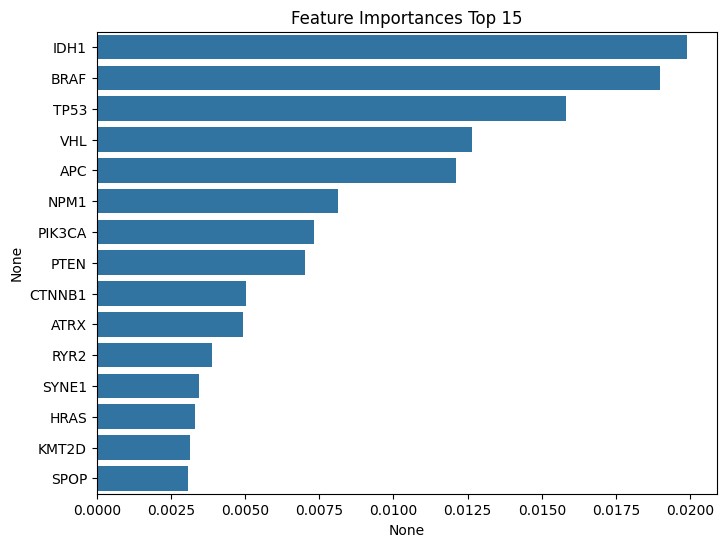

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 15')
sns.barplot(x=top15, y=top15.index)
plt.show()

#Multi-class classification

In [12]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# 예시 데이터 생성 (4000개의 특성을 가진 X_train DataFrame이라고 가정)
np.random.seed(42)
#X_train = pd.DataFrame(np.random.rand(100, 10), columns=[f'feature_{i}' for i in range(10)])  # 예시로 10개의 특성만 생성

# 특성 스케일링 (VIF 계산 전에 데이터 스케일링을 해주는 것이 좋음)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# VIF 계산 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# VIF 계산
vif_df = calculate_vif(pd.DataFrame(X_scaled, columns=X_train.columns))
print(vif_df)

# VIF 값이 10 이상인 특성 제거
threshold = 10
while vif_df['VIF'].max() > threshold:
    # VIF가 가장 큰 특성의 이름
    feature_to_remove = vif_df.sort_values('VIF', ascending=False)['feature'].iloc[0]
    
    # 해당 특성 제거
    print(f'Removing feature: {feature_to_remove}')
    X_train = X_train.drop(columns=[feature_to_remove])
    
    # VIF 다시 계산
    X_scaled = scaler.fit_transform(X_train)
    vif_df = calculate_vif(pd.DataFrame(X_scaled, columns=X_train.columns))

# 최종 선택된 특성들
print("Remaining features after VIF filtering:", X_train.columns)


KeyboardInterrupt: 

In [20]:
X_train.shape

(100, 10)

In [43]:
dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [17]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    'num_class': 26
}
num_boost_round = 50

dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round , early_stopping_rounds=5, 
                  evals=[(dtrain, 'train'), (dtest, 'valid')],
                  verbose_eval=2)

[0]	train-mlogloss:2.64693	valid-mlogloss:2.74535
[2]	train-mlogloss:2.25507	valid-mlogloss:2.47694
[4]	train-mlogloss:2.02316	valid-mlogloss:2.34719
[6]	train-mlogloss:1.86295	valid-mlogloss:2.26768
[8]	train-mlogloss:1.74061	valid-mlogloss:2.21736
[10]	train-mlogloss:1.64867	valid-mlogloss:2.18390
[12]	train-mlogloss:1.57313	valid-mlogloss:2.15511
[14]	train-mlogloss:1.51215	valid-mlogloss:2.13837
[16]	train-mlogloss:1.46004	valid-mlogloss:2.12145
[18]	train-mlogloss:1.41332	valid-mlogloss:2.11240
[20]	train-mlogloss:1.37251	valid-mlogloss:2.10646
[22]	train-mlogloss:1.33610	valid-mlogloss:2.10005
[24]	train-mlogloss:1.30321	valid-mlogloss:2.09653
[26]	train-mlogloss:1.27482	valid-mlogloss:2.09072
[28]	train-mlogloss:1.24871	valid-mlogloss:2.08667
[30]	train-mlogloss:1.22309	valid-mlogloss:2.08425
[32]	train-mlogloss:1.19996	valid-mlogloss:2.08396
[34]	train-mlogloss:1.17778	valid-mlogloss:2.08204
[36]	train-mlogloss:1.15651	valid-mlogloss:2.08240
[38]	train-mlogloss:1.13869	valid-ml

In [18]:
from collections import Counter
total_samples = len(y_train)
counter = Counter(y_train)

class_weight_dict = {cls: total_samples / count for cls, count in counter.items()}

In [44]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    #'learning_rate': 0.05
}
num_boost_round = 1000

clf = xgb.XGBClassifier( n_estimators = 100,        # 부스팅 단계 수
                        max_depth = 8,             # 개별 트리의 최대 깊이
                        learning_rate = 0.1,       # 학습률, 낮출수록 느리게 학습하지만 성능 개선 가능
                        subsample=0.8,           # 각 부스팅 단계에서 사용할 샘플의 비율
                        #scale_pos_weight = class_weight_dict,  # 클래스별 가중치
                        colsample_bytree=0.8,    # 각 트리에서 사용할 특성의 비율
                        random_state = 42,         # 랜덤 시드
                        n_jobs = -1,             # 모든 CPU 코어 사용,
                        early_stopping_rounds = 5,
                        **params)
clf.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test,y_test)],
        verbose=2);

[0]	validation_0-mlogloss:3.06126	validation_1-mlogloss:3.09934
[2]	validation_0-mlogloss:2.80383	validation_1-mlogloss:2.89310
[4]	validation_0-mlogloss:2.61447	validation_1-mlogloss:2.76225
[6]	validation_0-mlogloss:2.46534	validation_1-mlogloss:2.66287
[8]	validation_0-mlogloss:2.33723	validation_1-mlogloss:2.58151
[10]	validation_0-mlogloss:2.22387	validation_1-mlogloss:2.51546
[12]	validation_0-mlogloss:2.12639	validation_1-mlogloss:2.46072
[14]	validation_0-mlogloss:2.03964	validation_1-mlogloss:2.41372
[16]	validation_0-mlogloss:1.96116	validation_1-mlogloss:2.37521
[18]	validation_0-mlogloss:1.89256	validation_1-mlogloss:2.34424
[20]	validation_0-mlogloss:1.82985	validation_1-mlogloss:2.31398
[22]	validation_0-mlogloss:1.77148	validation_1-mlogloss:2.28799
[24]	validation_0-mlogloss:1.71832	validation_1-mlogloss:2.26651
[26]	validation_0-mlogloss:1.67006	validation_1-mlogloss:2.24512
[28]	validation_0-mlogloss:1.62464	validation_1-mlogloss:2.22850
[30]	validation_0-mlogloss:1.5

In [45]:
y_true = y_test
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
y_true.shape, y_pred.shape, y_score.shape

((1615,), (1615,), (1615, 26))

In [ ]:
y_true = y_test
y_pred = ensemble_model.predict(X_test)
#y_score = ensemble_model.predict_proba(X_test)
y_true.shape, y_pred.shape #, y_score.shape

In [46]:
from sklearn import metrics 
metrics.accuracy_score(y_true, y_pred)

0.3739938080495356

In [39]:
####

In [48]:
metrics.roc_auc_score(y_true, y_score, average='weighted', multi_class='ovr')

0.8658441922995864

In [ ]:
metrics.roc_auc_score(y_true, y_score, average='weighted', multi_class='ovr')

In [49]:
res = clf.predict(df_test) #.loc[:, list(selected_feature_names)])

In [50]:
res = encoder2.inverse_transform(res)

In [51]:

df_test1 = pd.read_csv('test.csv')
res_df = pd.DataFrame ({'ID' : df_test1['ID'], 'SUBCLASS' : res})
res_df


,ID,SUBCLASS
0,TEST_0000,STES
1,TEST_0001,UCEC
2,TEST_0002,GBMLGG
3,TEST_0003,GBMLGG
4,TEST_0004,LUSC
...,...,...
2541,TEST_2541,COAD
2542,TEST_2542,HNSC
2543,TEST_2543,SKCM
2544,TEST_2544,LAML


In [52]:
res_df.SUBCLASS.value_counts()

SUBCLASS
COAD      446
PRAD      258
BRCA      257
OV        177
STES      165
KIRC      138
GBMLGG    135
KIPAN     125
SKCM      105
UCEC       84
THCA       84
HNSC       71
LAML       61
LGG        58
PCPG       53
TGCT       50
LIHC       43
SARC       42
LUAD       41
CESC       35
BLCA       34
LUSC       30
ACC        21
PAAD       18
THYM       13
DLBC        2
Name: count, dtype: int64

In [53]:
res_df.to_csv('submit-select200-3.csv',index = False)

In [ ]:
total